# Исследование для интернет-магазина компьютерных игр "Стримчик"

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Цель**: выявить определяющие успешность игры закономерности. 

_Это позволит:_
- сделать ставку на потенциально популярный продукт; 
- спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. 

**Примечания**

_В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков»._

_Данные за 2016 год могут быть неполными._


**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


# Содержание
- [Загрузка данных](#Загрузка-данных)
- [Предобработка данных](#Предобработка-данных)
- [Исследовательский анализ данных](#Исследовательский-анализ-данных)
- [Портрет пользователя каждого региона](#Портрет-пользователя-каждого-региона)
- [Проверка гипотез](#Проверка-гипотез)
- [Общий вывод](#Общий-вывод)

#  Загрузка данных <a name="Загрузка-данных"></a>

In [1]:
#Импортируем необходимые библиотеки для работы

#Базовые библиотеки
import pandas as pd
import numpy as np
import warnings

from scipy import stats as st #подключение модуля stats из библиотеки scipy 

#Графики
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
#Зададим формат отображения вещественных чисел в Pandas
pd.set_option('display.float_format', '{:,.2f}'.format)

#Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

#Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

#Не показываем предупреждения
warnings.filterwarnings(action='ignore')

In [3]:
data = pd.read_csv('/datasets/games.csv')

def data_overview(data):
    print('Первые 5 строк')
    display(data.head())
    print('Последние 5 строк')
    display(data.tail())
    print('Типы данных\n')
    display(data.info())
    print('Статистическая информация')
    display(data.describe())
    print('Пропуски\n')
    for element in data.columns:
        if data[element].isna().sum() > 0: 
            print(element, ' - ', data[element].isna().sum(), 'пропусков') 
            count = +1
        if count == 0:
            print('Пропусков НЕТ')
    
    if data.duplicated().sum() > 0:
        print('\nДубликатов: ', data.duplicated().sum())
    else:
        print('\nДубликатов НЕТ')

In [4]:
data_overview(data)

Первые 5 строк


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Последние 5 строк


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,"2,016.00",Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,"2,006.00",Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,"2,016.00",Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,"2,003.00",Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,"2,016.00",Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN


Типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Статистическая информация


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


Пропуски

Name  -  2 пропусков
Year_of_Release  -  269 пропусков
Genre  -  2 пропусков
Critic_Score  -  8578 пропусков
User_Score  -  6701 пропусков
Rating  -  6766 пропусков

Дубликатов НЕТ


**Вывод**

Загрузили и рассмотрели данные. Согласно общей информации:

- наименование столбцов необходимо привести к snake_case;
- столбцы Year_of_Release, Critic_Score, User_Score имеют не подходящий тип данных;  
- обнаружено большое количество пропусков в столбцах Critic_Score, Rating, User_Score; 
- явных дубликатов не выявлено.

# Предобработка данных <a name="Предобработка-данных"></a>

Подготовим данные к дальнейшему исследовательскому анализу.

**1) Заменим названия столбцов (приведем к нижнему регистру)**

In [5]:
#Приведем наименования стобцов к нижнему регистру
data.columns = data.columns.str.lower()

#Проверяем
list(data.columns)

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

**2) Обрабатываем пропуски, преобразуем данные в нужные типы**

**Столбец name**

In [6]:
#Смотрим пропущенные значения
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В данных строках много пропущенных значений, стоит их удалить, так как заменить нет возможности.

In [7]:
#Удаляем строки с пропущенными значениями в столбце name
data.dropna(subset=['name'], inplace=True)
data = data.reset_index(drop=True)

**Столбец year_of_release**

In [8]:
#Смотрим пропущенные значения в столбце year_of_release
data[data.year_of_release.isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [9]:
#Посмотрим на количество пропущенных значений по платформам
data.loc[data['year_of_release'].isna()].groupby('platform')['genre'].count().sort_values(ascending=False)

platform
PS2     34
Wii     34
DS      30
X360    30
PS3     25
XB      21
2600    17
PC      17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
GB       1
PSV      1
Name: genre, dtype: int64

Больше всего пропущенных значений по годам выпуска на платформе PS2 и Wii. Посмотрим есть ли какая-то закономерность.

In [10]:
#Смотрим на  пропущенных значений в годе выпуска на платформе PS2
data.loc[(data['year_of_release'].isna()) & (data['platform'] == 'PS2')].sort_values(by='name').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5654,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.00,8.6,E
15673,Cabela's Alaskan Adventure,PS2,NaN,Sports,0.01,0.01,0.00,0.00,NaN,NaN,NaN
6623,College Hoops 2K6,PS2,NaN,Sports,0.12,0.10,0.00,0.03,77.00,7.3,E
12583,Combat Elite: WWII Paratroopers,PS2,NaN,Shooter,0.03,0.02,0.00,0.01,54.00,tbd,T
10999,Demon Chaos,PS2,NaN,Action,0.00,0.00,0.09,0.00,NaN,NaN,NaN
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
5587,Final Fantasy XI,PS2,NaN,Role-Playing,0.08,0.06,0.15,0.02,85.00,6.9,T
4847,Harvest Moon: Save the Homeland,PS2,NaN,Simulation,0.19,0.15,0.00,0.05,76.00,8.8,E
6100,Haven: Call of the King,PS2,NaN,Platform,0.14,0.11,0.00,0.04,69.00,6.9,T
8318,James Cameron's Dark Angel,PS2,NaN,Action,0.08,0.07,0.00,0.02,48.00,6.5,T


In [11]:
#Посмотрим сколько от общего количества данных - данных с пропущенными значениями в year_of_release
data['year_of_release'].isna().sum() / len(data)

0.016095255190570215

Получается 1,6% - это пропуски в годах выпуска игр. Пропущенные значения в столбце year_of_release скорее всего случайны. Возможно это ошибка при заполнении данных. Поэтому заменим пропущенные значения на np.nan. Np.nan — это константа, представляющая отсутствующее или неопределенное числовое значение в массиве NumPy. Означает «не число» и имеет тип float, что позволит привести данные в этом столбце к нужному типу.

In [12]:
#Заменим пропущенные значения на np.nan
data['year_of_release'] = data['year_of_release'].replace('Nan', np.nan, regex=True)

#Преобразем непропущенные данные в столбце year_of_release в тип int:
data['year_of_release'] = data[(data['year_of_release'].isna() == False)]['year_of_release'].astype('int')

**Столбец genre**

Когда работали со столбцом name, в тех же 2х строках были и пропуски по жанру игру. Значит пропусков в столбце genre быть не должно.

In [13]:
#Проверим
data['genre'].isna().sum()

0

**Столбец сritic_score**

In [14]:
data['critic_score'] = data['critic_score'].astype(float)

In [15]:
#Посмотрим сколько от общего количества данных - данных с пропущенными значениями в сritic_score
data['critic_score'].isna().sum() / len(data)

0.5131334889008556

51% пропущенных значений, это много. Поищем закономерности и связи.

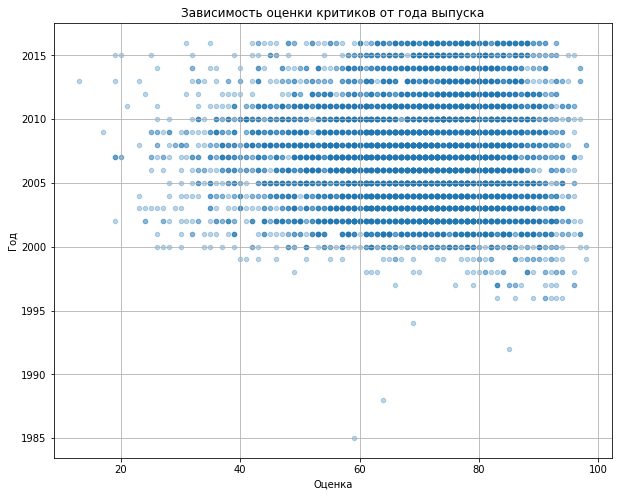

In [16]:
data.plot(
        x='critic_score', 
        y='year_of_release', 
        kind='scatter', 
        alpha=0.3, 
        figsize=(10, 8),
        grid=True) 
plt.title('Зависимость оценки критиков от года выпуска')
plt.xlabel('Оценка')
plt.ylabel('Год');

Из графика видно, что оценки от критиков игры стали получать после 1995 года.

In [17]:
#Посчитаем сколько игр  вышедших позднее 1995 года
data.loc[data['year_of_release'] < 1995, 'year_of_release'].count()

486

In [18]:
#Посчитаем сколько игр без оценки критиков, вышедшие позднее 1995 года
data.loc[(data['critic_score'].isna()) & (data['year_of_release'] < 1995), 'year_of_release'].count()

482

In [19]:
#Посмотрим эти 4 игры
data.loc[(data['critic_score'] > 0) & (data['year_of_release'] < 1995)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14468,Alter Ego,PC,"1,985.00",Simulation,0.00,0.03,0.00,0.01,59.00,5.8,T
1566,Battle Arena Toshinden,PS,"1,994.00",Fighting,0.39,0.26,0.53,0.08,69.00,6.3,T
14608,Doom,PC,"1,992.00",Shooter,0.02,0.00,0.00,0.00,85.00,8.2,M
14619,SimCity,PC,"1,988.00",Simulation,0.00,0.02,0.00,0.01,64.00,2.2,E10+


Можем предположить, что наличиние значений оценки зависит от года выпуска игры.

**Столбец user_score**

In [20]:
#Посмотрим уникальные значения столбца user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце user_score обнаружены значения tbd, что можно расшифровываеть как *to be determined*, то есть "будет определено", значит можем предположить, что эти данные были  не заполнены специально. Необходимо заменить tbd на np.nan, приведем тип данных к float.

In [21]:
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True).astype(float)

In [22]:
#Посмотрим сколько от общего количества данных - данных с пропущенными значениями в user_score
data['user_score'].isna().sum() / len(data)

0.5458625022437623

54% пропусков в столбце. Проверим взаимосвязь с годом выпуска игры.

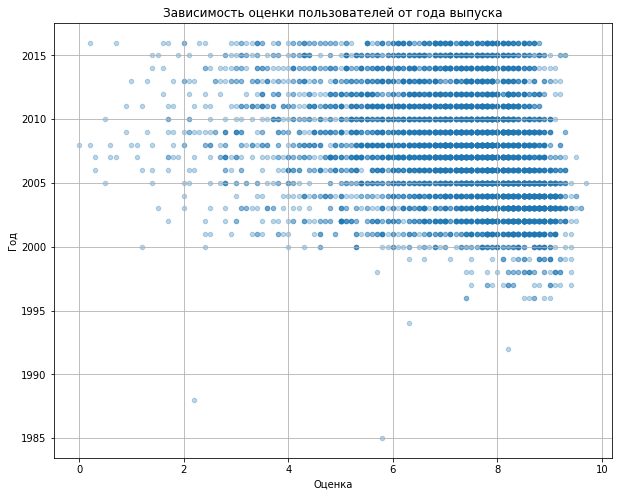

In [23]:
data.plot(
        x='user_score', 
        y='year_of_release', 
        kind='scatter', 
        alpha=0.3, 
        figsize=(10, 8),
        grid=True) 
plt.title('Зависимость оценки пользователей от года выпуска')
plt.xlabel('Оценка')
plt.ylabel('Год');

Также видим, что игры с оценками пользователей позднее 1995 года.

In [24]:
#Посчитаем сколько игр без оценок пользователей, вышедших позднее 1995 года
data.loc[(data['user_score'].isna()) & (data['year_of_release'] < 1995), 'year_of_release'].count()

482

In [25]:
#Посмотрим игры с оценками пользователей
data.loc[(data['user_score'] > 0) & (data['year_of_release'] < 1995)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14468,Alter Ego,PC,"1,985.00",Simulation,0.00,0.03,0.00,0.01,59.00,5.80,T
1566,Battle Arena Toshinden,PS,"1,994.00",Fighting,0.39,0.26,0.53,0.08,69.00,6.30,T
14608,Doom,PC,"1,992.00",Shooter,0.02,0.00,0.00,0.00,85.00,8.20,M
14619,SimCity,PC,"1,988.00",Simulation,0.00,0.02,0.00,0.01,64.00,2.20,E10+


Получилось, что те же самые 4 игры, что и с оценками критиков.

**Столбец rating**

_Напомним_

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [26]:
#Посмотрим какие есть значения в столбце rating
data['rating'].value_counts()


E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Информация относительно рейтинга.

«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.


«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults"):

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года.

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.


«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое.

«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу:

«RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M». Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариант



Следовательно можно заменить 'K-A' на 'E'.


In [27]:
#Заменяем 'K-A' на 'E'
data.loc[(data['rating'] == 'K-A'), 'rating'] = 'E'

In [28]:
#Проверяем
data['rating'].value_counts()

E       3993
T       2961
M       1563
E10+    1420
EC         8
RP         3
AO         1
Name: rating, dtype: int64

In [29]:
#Посмотрим сколько от общего количества данных - данных с пропущенными значениями в rating
data['rating'].isna().sum() / len(data)

0.40471489259857596

40% пропущенных значений.

In [30]:
#Посмотрим на количество пропущенных значений по платформам
data.loc[data['rating'].isna()].groupby('year_of_release')['genre'].count().sort_values(ascending=False)

year_of_release
2,010.00    456
2,008.00    446
2,011.00    433
2,009.00    415
2,007.00    376
1,998.00    347
2,006.00    328
2,012.00    298
1,999.00    296
2,015.00    291
1,997.00    270
1,996.00    256
2,014.00    236
2,005.00    233
2,013.00    228
2,016.00    222
1,995.00    219
2,000.00    202
2,002.00    174
2,004.00    164
2,003.00    162
2,001.00    143
1,994.00    120
1,993.00     60
1,981.00     46
1,991.00     41
1,992.00     41
1,982.00     36
1,986.00     21
1,989.00     17
1,983.00     17
1,990.00     16
1,987.00     16
1,988.00     14
1,984.00     14
1,985.00     13
1,980.00      9
Name: genre, dtype: int64

Как мы видим, от годы выпуска игры не зависит наличие рейтинга ESRB. Возможно у каких-то игр рейтинга нет, потому что рейтинг ESRB - для США и Канады,  или это техническая ошибка.

In [31]:
#Заменим nan на unknown, тогда данные попадут в отчеты,статистики
data['rating'] = data['rating'].fillna('Unknown')
data.rating.value_counts()

Unknown    6764
E          3993
T          2961
M          1563
E10+       1420
EC            8
RP            3
AO            1
Name: rating, dtype: int64

In [32]:
#Проверим явные дубликаты
data.duplicated().sum()

0

In [33]:
#Проверим неявные дубликаты
data[['name', 'platform']].duplicated().sum()

4

In [34]:
data[['name', 'platform']].value_counts()

name                               platform
Sonic the Hedgehog                 PS3         2
Need for Speed: Most Wanted        PC          2
                                   X360        2
Madden NFL 13                      PS3         2
 Beyblade Burst                    3DS         1
                                              ..
Halo: Combat Evolved Anniversary   X360        1
Halo: Reach                        X360        1
Halo: The Master Chief Collection  XOne        1
Hammerin' Hero                     PSP         1
¡Shin Chan Flipa en colores!       DS          1
Length: 16709, dtype: int64

In [35]:
data[data['name'].values  == 'Sonic the Hedgehog']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,"1,991.00",Platform,3.03,0.91,0.26,0.13,NaN,NaN,Unknown
1744,Sonic the Hedgehog,PS3,"2,006.00",Platform,0.41,0.06,0.04,0.66,43.00,4.10,E10+
1995,Sonic the Hedgehog,X360,"2,006.00",Platform,0.44,0.48,0.00,0.11,46.00,4.40,E10+
4126,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.00,4.10,E10+


In [36]:
data[data['name'].values  == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,"2,005.00",Racing,2.03,1.79,0.08,0.47,82.00,9.10,T
523,Need for Speed: Most Wanted,PS3,"2,012.00",Racing,0.71,1.46,0.06,0.58,NaN,NaN,Unknown
1189,Need for Speed: Most Wanted,X360,"2,012.00",Racing,0.62,0.78,0.01,0.15,83.00,8.50,T
1590,Need for Speed: Most Wanted,X360,"2,005.00",Racing,1.00,0.13,0.02,0.10,83.00,8.50,T
1997,Need for Speed: Most Wanted,XB,"2,005.00",Racing,0.53,0.46,0.00,0.05,83.00,8.80,T
2047,Need for Speed: Most Wanted,PSV,"2,012.00",Racing,0.33,0.45,0.01,0.22,NaN,NaN,Unknown
3580,Need for Speed: Most Wanted,GC,"2,005.00",Racing,0.43,0.11,0.00,0.02,80.00,9.10,T
5971,Need for Speed: Most Wanted,PC,"2,005.00",Racing,0.02,0.23,0.00,0.04,82.00,8.50,T
6272,Need for Speed: Most Wanted,WiiU,"2,013.00",Racing,0.13,0.12,0.00,0.02,NaN,NaN,Unknown
6409,Need for Speed: Most Wanted,DS,"2,005.00",Racing,0.24,0.01,0.00,0.02,45.00,6.10,E


In [37]:
data[data['name'].values  == 'Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,"2,012.00",Sports,2.53,0.15,0.00,0.17,81.00,5.80,E
604,Madden NFL 13,PS3,"2,012.00",Sports,2.11,0.22,0.00,0.23,83.00,5.50,E
3985,Madden NFL 13,Wii,"2,012.00",Sports,0.47,0.00,0.00,0.03,NaN,7.30,E
5886,Madden NFL 13,PSV,"2,012.00",Sports,0.28,0.00,0.00,0.02,63.00,7.30,E
7065,Madden NFL 13,WiiU,"2,012.00",Sports,0.21,0.00,0.00,0.02,75.00,6.70,E
16228,Madden NFL 13,PS3,"2,012.00",Sports,0.00,0.01,0.00,0.00,83.00,5.50,E


Выявили, что повторяются строки с игрой Sonic the Hedgehog на платформе PS3, Madden NFL 13 на платформе PS3. Необходимо похожие строки удалить.

In [38]:
data.drop(labels = [4126, 16228], axis = 0, inplace = True)

In [39]:
#Проверим неявные дубликаты
data[['name', 'platform']].duplicated().sum()

2

Строки с Need for Speed: Most Wanted на платформе X360 не трогали, так как год выхода разный. Оставим.

In [40]:
#Проверим весь датафрейм после проделанной работы
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16711 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16711 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16711 non-null  object 
 4   na_sales         16711 non-null  float64
 5   eu_sales         16711 non-null  float64
 6   jp_sales         16711 non-null  float64
 7   other_sales      16711 non-null  float64
 8   critic_score     8135 non-null   float64
 9   user_score       7588 non-null   float64
 10  rating           16711 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


**Добавим новый столбец с общими продажами**

Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [41]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

#Проверяем
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknown,30.26
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.40,E,28.32
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknown,28.31


**Вывод**

Подготовили данные к дальнейшей исследовательской работе, а именно:

- Привели наименования столбцов к нижнему регистру.
- Удалили строки с пропущенными значениями в name и genre, так как никаким образом невозможно заменить значения, и было всего 2 таких строки.
- 50% ("плюс-минус") пропущенных значений в столбцах critic_score, user_score, rating, которые могли возникнуть по разным причинам: человеческий фактор, техническая ошибка, отсутсвие данных. 50% всех данных удалять мы не можем. Заменять медианами или другими способами - это значит искажать в дальнейшем результаты исследования. Оставили пропуски, заменив на np.nan., чтобы привести к нужному типу данных, что и было сделано.
- В столбце user_score  были обнаружены значения tbd, заменены на np.nan.
- Выявили неявные дубликаты по названию игры и платформе, проверили, удалили 2 строки.
- Добавили новый столбец с суммарными продажами во всех регионах. 



# Исследовательский анализ данных <a name="Исследовательский-анализ-данных"></a>

**Посмотрим, сколько игр выпускалось в разные годы**

In [42]:
#Посмотрим количество игр по дате выпуска
data['year_of_release'].value_counts()

2,008.00    1427
2,009.00    1426
2,010.00    1255
2,007.00    1197
2,011.00    1136
2,006.00    1006
2,005.00     939
2,002.00     829
2,003.00     775
2,004.00     762
2,012.00     652
2,015.00     606
2,014.00     581
2,013.00     544
2,016.00     502
2,001.00     482
1,998.00     379
2,000.00     350
1,999.00     338
1,997.00     289
1,996.00     263
1,995.00     219
1,994.00     121
1,993.00      60
1,981.00      46
1,992.00      43
1,991.00      41
1,982.00      36
1,986.00      21
1,989.00      17
1,983.00      17
1,987.00      16
1,990.00      16
1,988.00      15
1,984.00      14
1,985.00      14
1,980.00       9
Name: year_of_release, dtype: int64

In [43]:
data['year_of_release'].describe()

count   16,443.00
mean     2,006.49
std          5.88
min      1,980.00
25%      2,003.00
50%      2,007.00
75%      2,010.00
max      2,016.00
Name: year_of_release, dtype: float64

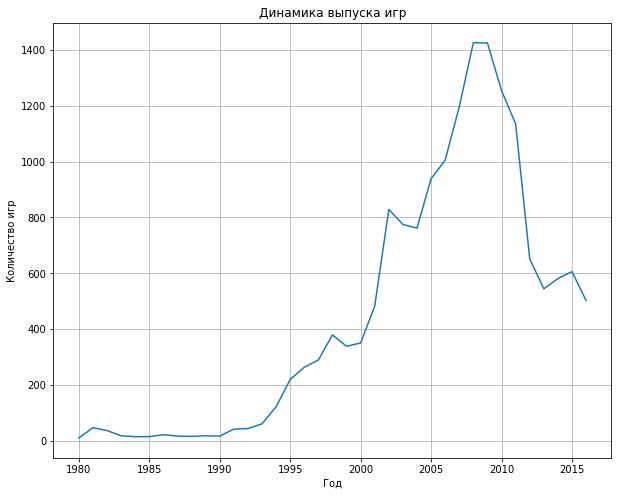

In [44]:
#Визуализируем данные количества игр по дате выпуска
data.pivot_table(index = 'year_of_release', values = 'name', aggfunc='count').plot(figsize=(10, 8), grid=True, legend=None) 
plt.title('Динамика выпуска игр')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show;

Из графика видно, что рост выпуска игр начался с 1990 года, рост был до 2008-2009 (пик), далее идет на спад. Данные за все периоды важны, так как благодаря этим данным есть возможность проследить динамику выпуска игр.

**Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.** 

In [45]:
#Посмотрим информацию по данным в столбце platform
data['platform'].describe()

count     16711
unique       31
top         PS2
freq       2161
Name: platform, dtype: object

In [46]:
#Посмотрим платформы по общим продажам
data_platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
data_platform_sales

platform
PS2    1,255.77
X360     971.42
PS3      939.16
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [47]:
#Выбираем платформы с наибольшими суммарными продажами 
platform_sales = data.pivot_table(index='platform', values='total_sales', aggfunc=['sum'])
platform_sales.columns = ['total_sales']
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)
top_platform_sales = platform_sales.head(10)
top_platform_sales

,total_sales
platform,
PS2,"1,255.77"
X360,971.42
PS3,939.16
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [48]:
#Создаем сводную таблицу топ-платформ по продажам
top_pivot = data \
.query('platform in @top_platform_sales.index') \
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

top_pivot.head()

platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
"1,985.00",0.02,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1,988.00",NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1,992.00",NaN,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1,994.00",NaN,NaN,12.87,6.03,NaN,NaN,NaN,NaN,NaN,NaN
"1,995.00",NaN,NaN,4.22,35.96,NaN,NaN,NaN,NaN,NaN,NaN


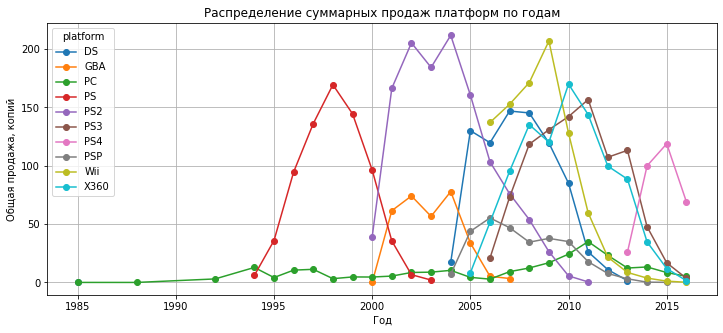

In [49]:
#Строим графики
top_pivot.plot(style='o-', grid=True, figsize=(12, 5))
plt.title('Распределение суммарных продаж платформ по годам')
plt.xlabel('Год')
plt.ylabel('Общая продажа, копий')
plt.show();


Новые платформы стремительно набирают популярность, удерживают большие продажи в течение 3-4 года, после чего идет спад. Существуют же платформу в целом около 10 лет.

Из выбранных 10ти топ-платформ по продажам:
- Больше других продала платформа - PS2 (самые большие пиковые значения, и длинный "хвост" спада продаж);
- Меньше всех - РС (причем продажи с 1985 года, но по объему небольшие в итоге).

Примечательно, что с 2010 у всех выражен спад продаж.

**Актуальный период**

Берем данные за 2014-2016 года. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [50]:
#Создаем таблицу с актуальным периодом
data_2014_2016 = data.query('year_of_release == [2014, 2015, 2016]')
data_2014_2016.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,"2,015.00",Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
42,Grand Theft Auto V,PS4,"2,014.00",Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,"2,014.00",Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Unknown,11.68
77,FIFA 16,PS4,"2,015.00",Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,"2,015.00",Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,"2,014.00",Shooter,2.81,3.48,0.14,1.23,83.00,5.70,M,7.66
94,FIFA 17,PS4,"2,016.00",Sports,0.66,5.75,0.08,1.11,85.00,5.00,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,"2,014.00",Fighting,3.27,1.37,2.43,0.48,NaN,NaN,Unknown,7.55
99,Call of Duty: Black Ops 3,XOne,"2,015.00",Shooter,4.59,2.11,0.01,0.68,NaN,NaN,Unknown,7.39
105,Fallout 4,PS4,"2,015.00",Role-Playing,2.53,3.27,0.24,1.13,87.00,6.50,M,7.17


In [51]:
#Посмотрим общую информацию по данным за выбранный аткуальный период
data_2014_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   float64
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(8), object(4)
memory usage: 171.5+ KB


Выбрав актуальным периодом 2014-2016 гг., оставили 1689 строк, около 10% от изначального набора.

**Платформы, лидирующие по продажам**

In [52]:
#Выбираем платформы с наибольшими суммарными продажами 
sales_2014_2016 = data_2014_2016.pivot_table(index='platform', values='total_sales', aggfunc=['sum'])
sales_2014_2016.columns = ['total_sales']
top_sales = sales_2014_2016.sort_values(by='total_sales', ascending=False)
top_sales

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


In [53]:
#Создаем сводную таблицу по аутальному периоду
top_pivot_sales = data_2014_2016 \
.query('platform in @top_sales.index') \
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
top_pivot_sales

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
"2,014.00",43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
"2,015.00",27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
"2,016.00",15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


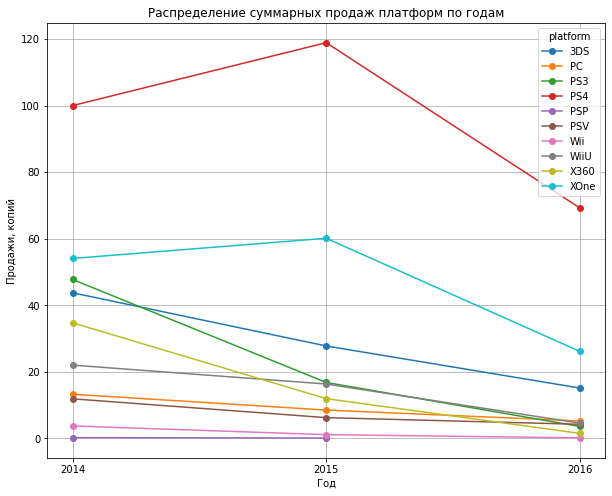

In [54]:
#Строим графики
top_pivot_sales.plot(style='o-', grid=True, figsize=(10, 8))
plt.title('Распределение суммарных продаж платформ по годам')
plt.xlabel('Год')
plt.ylabel('Продажи, копий')
plt.xticks([2014, 2015, 2016])
plt.show();

Результаты за выбранный актуальный период (2014-2016 гг.) отличаются от общего периода:
- в топе - платформы PS4 и XOne ( в сравнении в общем была PS2);
- меньше всего продаж за выбранный период у PSP.

В целом тенденция - спад продаж к 2016.

**Строим график «ящик с усами» по глобальным продажам игр в разбивке по платформам**

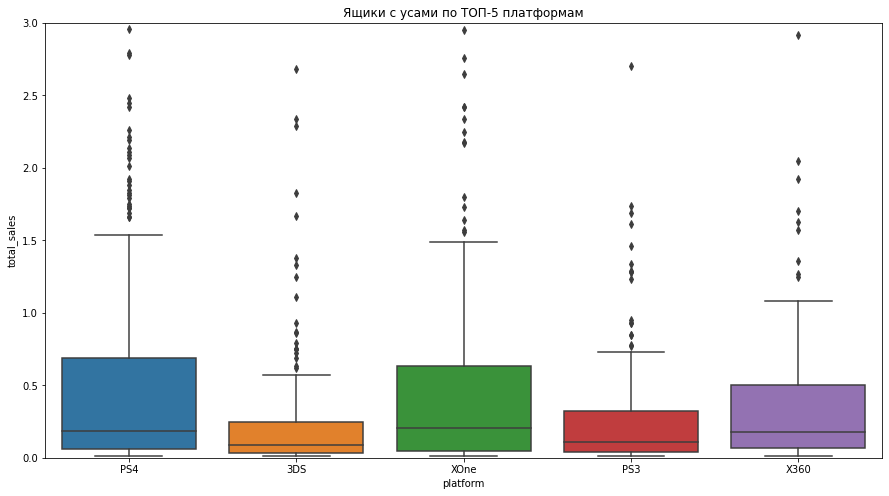

In [57]:
top_5_platform = data_2014_2016.query('platform in ["PS4", "XOne", "3DS", "PS3", "X360"]')

plt.figure(figsize=(15, 8))
ax = sb.boxplot(x='platform', y='total_sales', data=top_5_platform)
plt.ylim(0,3)

plt.title('Ящики с усами по ТОП-5 платформам')
plt.show();

Размах у представленных платформ разный, медиана у платформ PS4, XOne, WiiU, X360, Wii примерно на одном уровне, потенциально перспективные. Наиболее эффективные в продажах в выбранный актуальный период  с 2014 по 2016 - это Wii и PS4, вместе с тем максимум доходит до 15 млн проданных копий у PS4 и XOne.

Топ-5 платформ по общим продажам (за актуальный период):

- PS4, 
- XOne, 
- 3DS, 
- PS3, 
- X360

**Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков**

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [58]:
#Методом query выбирает строки по фрейму данных на основе выбранных значений столбцов
sales_score = data_2014_2016.query(
    'platform == "PS4" & critic_score.notna() & user_score.notna()')

#Проверяем
sales_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 42 to 16528
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             234 non-null    object 
 1   platform         234 non-null    object 
 2   year_of_release  234 non-null    float64
 3   genre            234 non-null    object 
 4   na_sales         234 non-null    float64
 5   eu_sales         234 non-null    float64
 6   jp_sales         234 non-null    float64
 7   other_sales      234 non-null    float64
 8   critic_score     234 non-null    float64
 9   user_score       234 non-null    float64
 10  rating           234 non-null    object 
 11  total_sales      234 non-null    float64
dtypes: float64(8), object(4)
memory usage: 23.8+ KB


Коэффициент корреляции Пирсона: 0.4


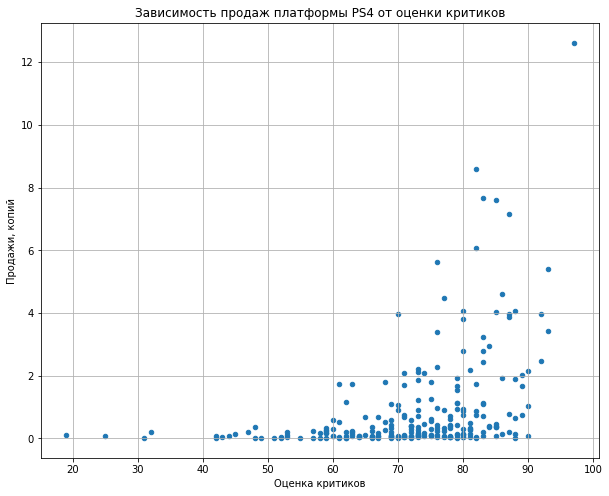

In [59]:
#Строим диаграмму рассеяния
sales_score.plot(
        x='critic_score', 
        y='total_sales', 
        kind='scatter', 
        figsize=(10, 8),
        grid=True) 
plt.title('Зависимость продаж платформы PS4 от оценки критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, копий');

print('Коэффициент корреляции Пирсона:', sales_score['total_sales'].corr(sales_score['critic_score']).round(2))

Коэффициент корреляции Пирсона: -0.04


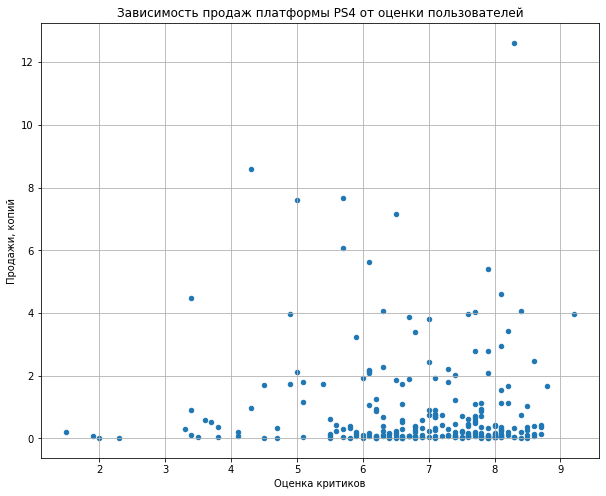

In [60]:
#Строим диаграмму рассеяния
sales_score.plot(
        x='user_score', 
        y='total_sales', 
        kind='scatter', 
        figsize=(10, 8),
        grid=True) 
plt.title('Зависимость продаж платформы PS4 от оценки пользователей')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, копий');

print('Коэффициент корреляции Пирсона:', sales_score['total_sales'].corr(sales_score['user_score']).round(2))

In [61]:
#Для сравнения смотрим корреляцию между отзывами и продажами на остальных платформах за тот же период :
data_2014_2016.query('platform != "PS4" & critic_score.notna() & user_score.notna()')[['total_sales',
                                                                          'critic_score','user_score']].corr()    

,total_sales,critic_score,user_score
total_sales,1.00,0.30,0.04
critic_score,0.30,1.00,0.49
user_score,0.04,0.49,1.00


Как видно из графиков по платформе PS4, оценка критиков critic_score влияет на продажи, зависимость положительная есть, но не сильная (коэффициент корреляции Пирсона: 0.40).Корреляции между пользовательсикими оценками и продажами нет.

В целом выводы, сделанные по PS4 соотносятся с общими по другим платформам, вошедших в выбранный актульный период. Корреляция 30% между оценкой критиков и продажами, а зависимости с пользовательским мнением нет.

**Посмотрим на общее распределение игр по жанрам**

In [62]:
#Выясним количественное распределение игр по жанрам
genre_2014_2016 = data_2014_2016.pivot_table(index='genre', values='name', aggfunc='count')
genre_2014_2016.columns = ['total_count']
genre_2014_2016 = genre_2014_2016.sort_values(by='total_count', ascending=False)
genre_2014_2016

,total_count
genre,
Action,619
Role-Playing,221
Adventure,185
Sports,161
Shooter,128
Misc,113
Racing,69
Fighting,60
Simulation,44


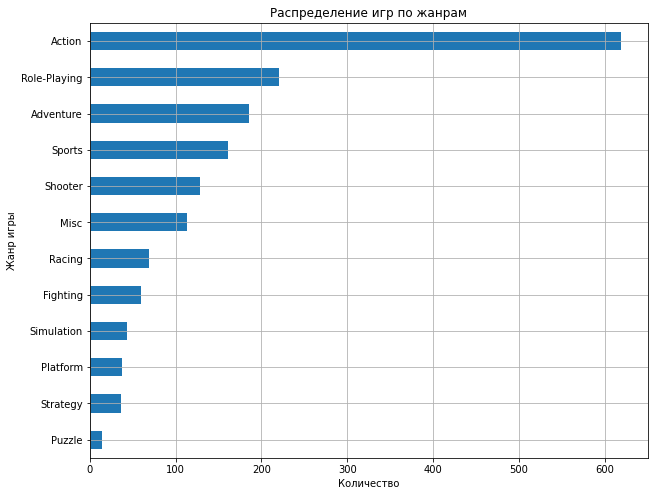

In [80]:
#Визуализируем данные 
genre_2014_2016.sort_values(by='total_count').plot(
    title='Распределение игр по жанрам', 
    kind='barh', 
    figsize=(10, 8),
    grid=True,
    legend=None)
plt.xlabel('Количество')
plt.ylabel('Жанр игры')
plt.show;

Выяснили, что 3 топовых жанра по количеству игр в выбранный актуальный период с 2014 по 2016 гг. - Action, Role-Playing и Adventure. С отрывом лидирует жанр Action, почтив 3 раза по сравнению со второй позицией.

In [85]:
#Создадим таблицу по жанрам и продажам:
genre_sales = data_2014_2016.pivot_table(index='genre', values='total_sales', aggfunc='median')
genre_sales.columns = ['median_sales']
genre_sales = genre_sales.sort_values(by='median_sales', ascending=False)
genre_sales

,median_sales
genre,
Shooter,0.52
Sports,0.18
Platform,0.14
Fighting,0.12
Role-Playing,0.11
Simulation,0.10
Action,0.09
Misc,0.09
Racing,0.09


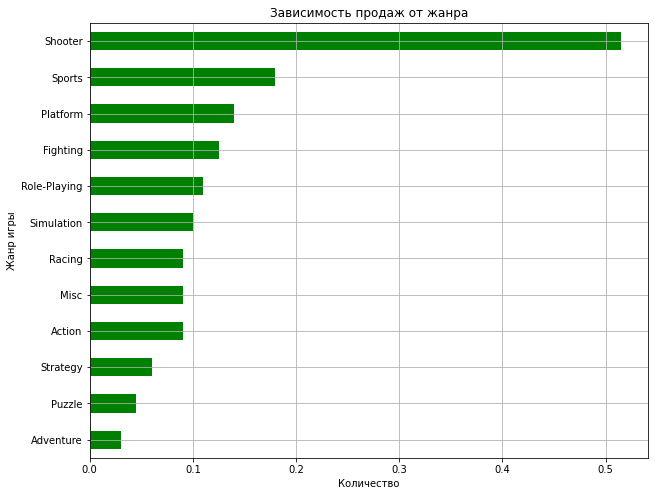

In [84]:
#Визуализируем данные 
genre_sales['median_sales'].sort_values().plot(
    title='Зависимость продаж от жанра', 
    kind='barh', 
    figsize=(10, 8),
    grid=True,
    legend=None,
    color='green')
plt.xlabel('Количество')
plt.ylabel('Жанр игры')
plt.show;

   
Выяснили, что зависимость продаж от жанра отличается от количества выпускаемых игр по жанрам.
Если смотреть распределение по медианному значению (продажи от жанра), то:

- 1е место shooterы;
- 2е место sports;
- 3е место platform.
    
Следовательно, показатель количества выпускаемых игр по жанру не есть равно распределению жанров по продажам.

# Портрет пользователя каждого региона <a name="Портрет-пользователя-каждого-региона"></a>

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). 
- Самые популярные жанры (топ-5). 
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?


**Определяем для каждого региона самые популярные платформы, жанры, зависимость продаж от рейтинга**

In [64]:
#Создадим функцию:
def plot_region(region):
    
    platform_2014_2016= (data_2014_2016.groupby('platform')[region].sum().
                                                   reset_index().
                                                   sort_values(by=region, ascending=False, ignore_index=True).head())
    
    genre_2014_2016 = (data_2014_2016.groupby('genre')[region].sum().
                                                   reset_index().
                                                   sort_values(by=region, ascending=False, ignore_index=True).head())
    
    rating_2014_2016 = (data_2014_2016.groupby('rating')[region].sum().
                                                   reset_index().
                                                   sort_values(by=region, ascending=False, ignore_index=True).head())
    
    x1=platform_2014_2016['platform']
    x2=genre_2014_2016['genre']
    x3=rating_2014_2016['rating']
    y1=platform_2014_2016[region]
    y2=genre_2014_2016[region]
    y3=rating_2014_2016[region]
    
    #задаем 3 графика
    fig, ax = plt.subplots(3, 1, figsize=(10, 12))
    fig.subplots_adjust(hspace=0.8)
        
    ax[0].bar(x1, y1, color="orange")
    ax[0].set_title('Продажи топ-5 платформ')
    ax[0].set_xlabel('Платформа')
    ax[0].set_ylabel('Продажи')

    ax[1].bar(x2, y2, color="green")
    ax[1].set_title('Продажи топ-5 жанров')
    ax[1].set_xlabel('Жанр')
    ax[1].set_ylabel('Продажи')

    ax[2].bar(x3, y3)
    ax[2].set_title('Продажи от рейтинга')
    ax[2].set_xlabel('Рейтинг')
    ax[2].set_ylabel('Продажи')
    
    plt.show();


**Регион NA**

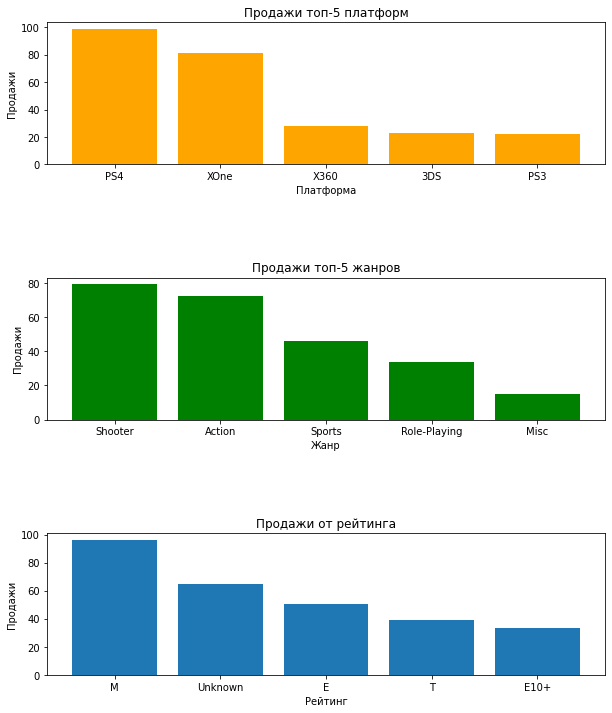

In [65]:
#Посмотрим регион - Северная Америка 
plot_region('na_sales')

**Регион EU**

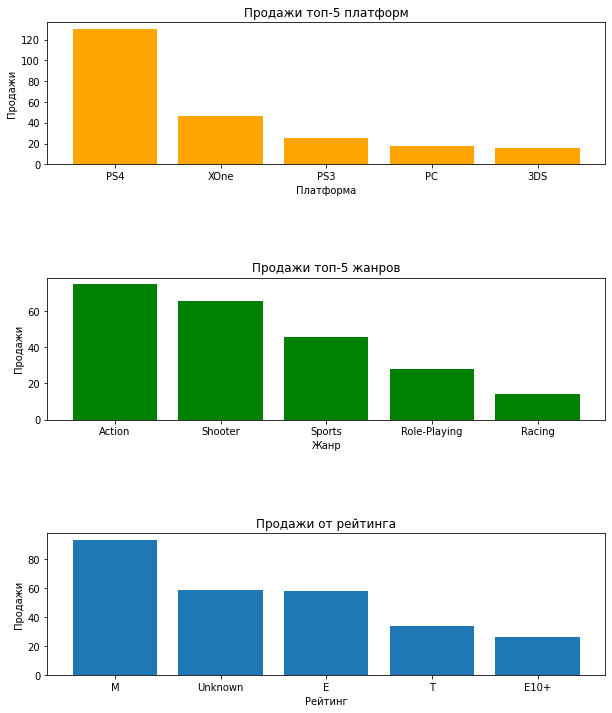

In [66]:
#Посмотрим регион - Европа
plot_region('eu_sales')

**Регион JP**

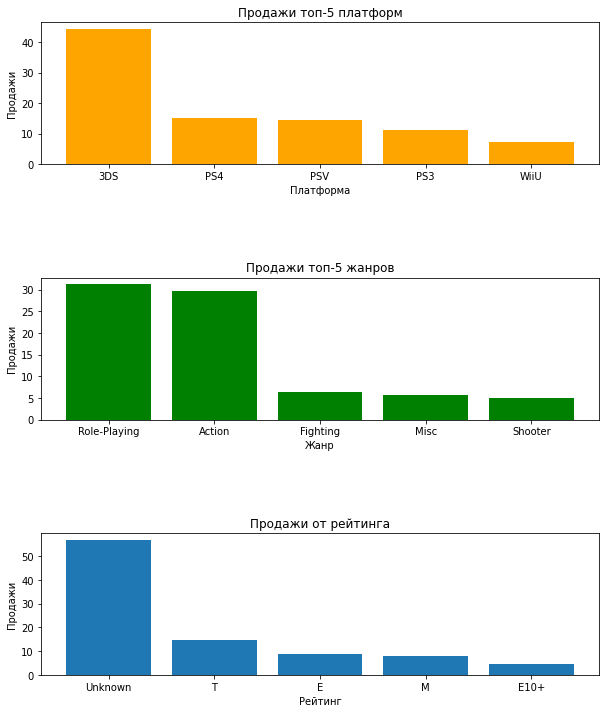

In [67]:
#Посмотрим регион - Япония 
plot_region('jp_sales')

**Вывод**

В регионах NA и EU больше всего продаж в категории М, E, T, то есть «Для взрослых», «Для всех», «Подросткам» (без учета категории, что рейтинг неизвестен).
В Японии больше всего продаж в категории "без категории", видимо выбирают игры  собственного производства, так как компания ESRB в основном базируется на оценивании Американских и Канадских компаний. 

**Портрет пользователя из Северной Америки:**
- выбирает платформу PS4
- чаще всего играет в shooterы
- рейтинг игры: для взрослых.
    
**Портрет пользователя из Европы:**
- предпочитает PS4
- в основном игры жанра action
- рейтинг: для взрослых.
    
**Портрет пользователя из Японии:**
- выбирает платформу 3DS
- для ролевых или экшн игры
- скорее всего игры собственного производства (так как рейтинг ESRB не указан).

Изучив каждый регион можно сделать вывод, что они имеют свою специфику.


# Проверка гипотез <a name="Проверка-гипотез"></a>

In [68]:
#Создадим "обертку" для статистических методов:
def check_hypothesis(ho, h1, alpha, sample_1, sample_2, equal_var=True):

    """
    Функция проверяет гипотезу о равенстве средних, используя t-критерий Стьюдента.
    
    Parametrs
    ---------
    ho: string
        Нулевая гипотеза.
    h1: string
        Альтернативная гипотеза.
    alpha: float
        Уровень значимости.
    sample_1: Pandas Dataframe
        Набор данных 1.
    sample_2: Pandas Dataframe
        Набор данных 2.
    equal_var: string
        True- значение по умолчанию. Параметр метода ttest_ind.
    
    Returns
    -------
    Функция возвращает None.
    """
    
    #выводим гипотезы, уровень значимости
    print(f'H0 (нулевая гипотеза): {ho}')
    print(f'H1 (альтернативная гипотеза): {h1}')
    print(f'Уровень значимости: {alpha}')
    print('')
    
    alpha = alpha
    #выводим среднее с дисперсией по сэмплам
    print('Sample_1')
    print(f'Среднее значение: {sample_1.mean():.2f}, дисперсия: {sample_1.var():.2f}')
    print('')
    
    print('Sample_2')
    print(f'Среднее значение: {sample_2.mean():.2f}, дисперсия: {sample_2.var():.2f}')
    print('')
    
    #применяем t-критерий Стьюдента из стандартного пакета
    results = st.ttest_ind(sample_1, 
                           sample_2,
                           equal_var=equal_var)
    print(f'p-значение: {results.pvalue}')
    print('')
    
    if results.pvalue < alpha: #сравниваем p-значение с alpha
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

**1) Проверяем гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

In [69]:
#Фильтруем данные
data_notna = data_2014_2016[data_2014_2016['user_score'].notnull()]

#Получаем 2 сэмпла
data_pc = data_notna[data_notna['platform'] == 'PC']['user_score']
data_xone = data_notna[data_notna['platform'] == 'XOne']['user_score']


check_hypothesis(
    'Средние пользовательские рейтинги платформ Xbox One и PC одинаковые', 
    'Средние пользовательские рейтинги платформ Xbox One и PC различаются', 
    0.05, 
    data_pc, 
    data_xone, 
    equal_var=True
)

H0 (нулевая гипотеза): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
H1 (альтернативная гипотеза): Средние пользовательские рейтинги платформ Xbox One и PC различаются
Уровень значимости: 0.05

Sample_1
Среднее значение: 6.30, дисперсия: 2.90

Sample_2
Среднее значение: 6.59, дисперсия: 1.89

p-значение: 0.10450507919348415

Не получилось отвергнуть нулевую гипотезу


Значение p-value оказалось больше уровня стат. значимости, следовательно нулевая гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, не отвергается. Это не значит, что она точно верна — просто по собранным данным её нельзя с уверенностью отвергнуть.

**2) Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

In [70]:
#Получаем 2 сэмпла
data_action = data_notna[data_notna['genre'] == 'Action']['user_score']
data_sports = data_notna[data_notna['genre'] == 'Sports']['user_score']


check_hypothesis(
    'Средние пользовательские рейтинги жанров Action и Sports одинаковые', 
    'Средние пользовательские рейтинги жанров Action и Sports различаются', 
    0.05, 
    data_action, 
    data_sports, 
    equal_var=True
)

H0 (нулевая гипотеза): Средние пользовательские рейтинги жанров Action и Sports одинаковые
H1 (альтернативная гипотеза): Средние пользовательские рейтинги жанров Action и Sports различаются
Уровень значимости: 0.05

Sample_1
Среднее значение: 6.76, дисперсия: 1.90

Sample_2
Среднее значение: 5.23, дисперсия: 3.45

p-значение: 2.8711147985105864e-19

Отвергаем нулевую гипотезу


Полученное значение p-value (2.8711147985105864e-19) меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что cредние пользовательские рейтинги жанров Action и Sports различаются. Среднее значение пользовательских рейтингов по жанрам Action и Sports действительно разные - разница 1,5 балла.

# Общий вывод <a name="Общий-вывод"></a>

Для исследования были получены данные о продажах компьютерных игр, выпускающиеся с 1980 по 2016 гг.

Была проведена **предобработка данных**: 
- заменены названия столбцов (приведены к нижнему регистру); 
- преобразованы данные в нужные типы; 
- обработаны пропуски;  
- посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец.  

Далее был проведен **исследовательский анализ**, в результате чего выяснили:
- Игровая индустрия с 1980 года по 1990 была развита слабо.
- Постепенный рост выпуска игр начался с 1990 года. 
- В 2000 году мы видим активный подъем и рост количества игр.
- Подъем продолжался до 2008-2009 (пиковые значения), в эти годы производили больше всего игр.
- Начиная с 2010 года количество выпускаемых игр значительно снизилось.

Топ-5 платформ по общим продажам (за весь период):
- PS2
- X360
- PS3
- Wii
- DS

Выяснили, что новые платформы стремительно набирают популярность, удерживают большие продажи в течение 3-4 года, после чего идет спад. Существуют же платформу в целом около 10 лет.

Платформы, показывающие успешные показатели по продажам за выбранный **актуальный период (2014-2016 года)** значительно отличаются от того графика, где представлены продажи платформ за все время. 
Топ-5 за актуальный период выглядит следующим образом: PS4, XOne, 3D, PS3, X360, значит они являются потенциально прибыльными.

Выявили, что оценка критиков влияет на продажи игр, но зависимость не сильная. Корреляции между пользовательсикими оценками и продажами нет.

Топ-5 жанров:
- Action (экшн)	
- Role-Playing (ролевые игры)	
- Adventure	(квест)
- Sports (спортивные игры)
- Shooter (шутеры)	

У **пользователей из регионов Северная Америка, Европа и Япония** разное предпочтение в выборе платформы для игр и жанра игры. 
- Пользователь из Северной Америки скорее всего купил игру жанра Shooter или Action в категории М на платформе PS4 или XOne.
- Пользователь из Европы купил Европа купил игру жанра Action или Shooter в рейтинге М на платформе PS4.
- Пользователь из Японии вероятнее всего купил ролевую игру на платформе 3DS их собственного производства. 

**Проверили гипотезы:**

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые: 
   - _не получилось отвергнуть нулевую гипотезу_ о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

2) Средние пользовательские рейтинги жанров Action и Sports разные:
   - _отвергли нулевую гипотезу_  о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые.
  

Если делать общее предположение о **потенциально прибыльном продукте**, на что делать акцент при планировании рекламных кампаний:
- игра на платформах PS4, XOne, 3DS жанра Shooter, Action или Role-Playing категории "для взрослых".